In [36]:
import sys  
sys.path.insert(0, '/home/diana/compressedCV')

In [37]:
import pandas as pd

In [38]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
from TensorFlow.scripts.xml_to_csv import xml_to_csv

In [5]:
df = xml_to_csv("/home/ubuntu/data/annotations")

100%|██████████| 58383/58383 [00:59<00:00, 982.95it/s] 


In [6]:
df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,C02032-US_20190109_10045800070.bmp,1820,940,Pedestrian,1293,418,1332,524
1,C02032-US_20190109_10045800070.bmp,1820,940,Pedestrian,1276,426,1301,520
2,C02032-US_20190109_10045800070.bmp,1820,940,PassengerCar,827,472,925,544
3,C02032-US_20190109_10045800070.bmp,1820,940,PassengerCar,961,483,986,504
4,C02032-US_20190109_10045800070.bmp,1820,940,PassengerCar,927,485,948,502


In [9]:
counts = df["class"].value_counts()
counts = pd.DataFrame(counts)
counts = counts.reset_index()
counts.columns = ['name', 'counts']
counts

,name,counts
0,PassengerCar,399790
1,Pedestrian,44161
2,Truck,19888
3,Van,18734
4,Bus,3165
5,Bicycle,621
6,Motorbike,121


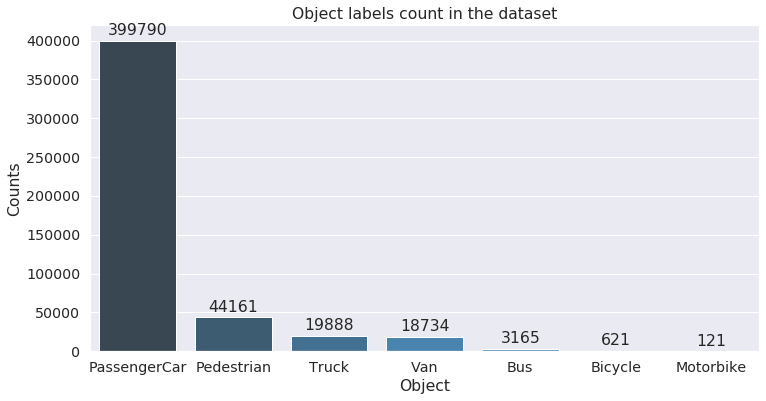

In [232]:
sns.set(rc={'figure.figsize':(12,6)}, font_scale=1.3)
ax = sns.barplot(x="name", y="counts", data=counts, palette="Blues_d")
ax.set(xlabel='Object', ylabel='Counts')
ax.set_title('Object labels count in the dataset')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.savefig("img/objects_counts.png", dpi=600)

In [10]:
def area(xmax, xmin, ymax, ymin):
    return (xmax - xmin)*(ymax-ymin)

In [11]:
df["area"] = area(df["xmax"], df["xmin"], df["ymax"], df["ymin"])

In [12]:
df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax,area
0,C02032-US_20190109_10045800070.bmp,1820,940,Pedestrian,1293,418,1332,524,4134
1,C02032-US_20190109_10045800070.bmp,1820,940,Pedestrian,1276,426,1301,520,2350
2,C02032-US_20190109_10045800070.bmp,1820,940,PassengerCar,827,472,925,544,7056
3,C02032-US_20190109_10045800070.bmp,1820,940,PassengerCar,961,483,986,504,525
4,C02032-US_20190109_10045800070.bmp,1820,940,PassengerCar,927,485,948,502,357


In [13]:
area_mean = df.groupby("class", as_index=False)["area"].mean()
area_mean

,class,area
0,Bicycle,4812.985507
1,Bus,35957.296051
2,Motorbike,5553.413223
3,PassengerCar,11715.199500
4,Pedestrian,3080.818165
5,Truck,31544.600915
6,Van,19347.091758


In [16]:
area_mean = area_mean.sort_values(by=['area'], ascending=False)

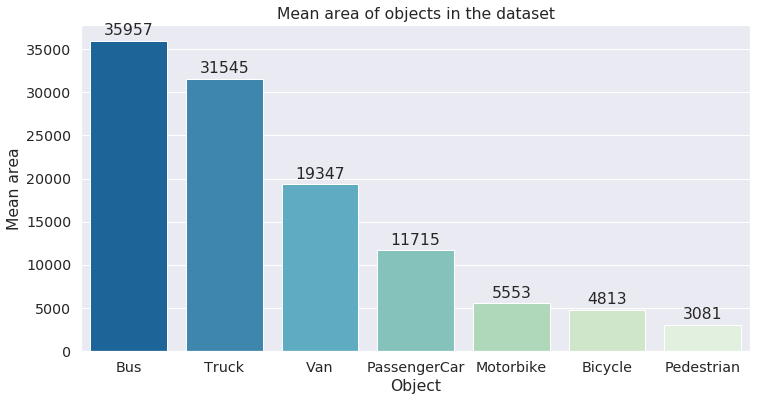

In [233]:
sns.set(rc={'figure.figsize':(12,6)}, font_scale=1.3)
ax = sns.barplot(x="class", y="area", data=area_mean, palette="GnBu_r")
ax.set(xlabel='Object', ylabel='Mean area')
ax.set_title('Mean area of objects in the dataset')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.savefig("img/objects_areas.png", dpi=600)

In [19]:
area_median = df.groupby("class", as_index=False)["area"].median()
area_median = area_median.sort_values(by=['area'], ascending=False)
area_median

,class,area
1,Bus,7700
5,Truck,5478
6,Van,4463
3,PassengerCar,2709
0,Bicycle,1680
4,Pedestrian,1273
2,Motorbike,968


In [130]:
data = pd.read_csv("../data/training_results.csv")
data["quality"] = data["quality"].map(str) + "% " + data["type"]
data

,name,ssd,resnet,fcnn,quality,type
0,classification_loss,2.352968,0.233760,0.169422,100% bmp,bmp
1,localization_loss,1.250106,0.290874,0.247223,100% bmp,bmp
2,Bicycle,0.002146,0.000000,0.000000,100% bmp,bmp
3,Bike_Bicycle_w/out_human,NaN,NaN,NaN,100% bmp,bmp
4,Bus,0.255653,0.000000,0.289679,100% bmp,bmp
...,...,...,...,...,...,...
99,Pedestrian,0.037644,0.070079,0.064737,1% jpg,jpg
100,Truck,0.306344,0.241802,0.271078,1% jpg,jpg
101,Van,0.194870,0.068837,0.167416,1% jpg,jpg
102,mAP at 0.5IOU,0.398075,0.467492,0.482337,1% jpg,jpg


In [96]:
data = data[(data["name"]!="Ignored")&(data["name"]!="Bike_Bicycle_w/out_human")]
data_objects = data[(data["name"]!="mAP at 0.5IOU")
            &(data["name"]!="Test+Train Data Size GB")
           &(data["name"]!="classification_loss")
           &(data["name"]!="localization_loss")]

data_objects.name.unique()

array(['Bicycle', 'Bus', 'Motorbike', 'PassengerCar', 'Pedestrian',
       'Truck', 'Van'], dtype=object)

In [22]:
mean = data_objects.groupby("name", as_index=False).mean()
mean

,name,ssd,resnet,fcnn
0,Bicycle,0.002428,0.000000,0.000162
1,Bus,0.226685,0.003648,0.184325
2,Motorbike,0.000000,0.000000,0.000000
3,PassengerCar,0.520440,0.699827,0.715745
4,Pedestrian,0.058307,0.228917,0.193558
5,Truck,0.390378,0.426669,0.470718
6,Van,0.268000,0.201713,0.346386


In [23]:
counts_merged = pd.merge(mean, counts, on='name', how='outer')
counts_merged

,name,ssd,resnet,fcnn,counts
0,Bicycle,0.002428,0.000000,0.000162,621
1,Bus,0.226685,0.003648,0.184325,3165
2,Motorbike,0.000000,0.000000,0.000000,121
3,PassengerCar,0.520440,0.699827,0.715745,399790
4,Pedestrian,0.058307,0.228917,0.193558,44161
5,Truck,0.390378,0.426669,0.470718,19888
6,Van,0.268000,0.201713,0.346386,18734


In [24]:
counts_area_merged = pd.merge(area_mean, counts_merged, how='left', left_on='class', right_on='name')

In [97]:
counts_area_merged.head(10)

,class,area,name,ssd,resnet,fcnn,counts
0,Bus,35957.296051,Bus,0.226685,0.003648,0.184325,3165
1,Truck,31544.600915,Truck,0.390378,0.426669,0.470718,19888
2,Van,19347.091758,Van,0.268000,0.201713,0.346386,18734
3,PassengerCar,11715.199500,PassengerCar,0.520440,0.699827,0.715745,399790
4,Motorbike,5553.413223,Motorbike,0.000000,0.000000,0.000000,121
5,Bicycle,4812.985507,Bicycle,0.002428,0.000000,0.000162,621
6,Pedestrian,3080.818165,Pedestrian,0.058307,0.228917,0.193558,44161


In [25]:
counts_area_merged.corr()

,area,ssd,resnet,fcnn,counts
area,1.000000,0.525788,0.067295,0.316651,-0.158222
ssd,0.525788,1.000000,0.855297,0.964469,0.691540
resnet,0.067295,0.855297,1.000000,0.951978,0.836122
fcnn,0.316651,0.964469,0.951978,1.000000,0.782312
counts,-0.158222,0.691540,0.836122,0.782312,1.000000


In [80]:
corr.style.background_gradient()

,area,ssd,resnet,fcnn,counts
area,1,0.525788,0.0672952,0.316651,-0.158222
ssd,0.525788,1,0.855297,0.964469,0.69154
resnet,0.0672952,0.855297,1,0.951978,0.836122
fcnn,0.316651,0.964469,0.951978,1,0.782312
counts,-0.158222,0.69154,0.836122,0.782312,1


## Relationship between number of labels per object / average object area and object's average precision on training results over each quality

In [28]:
data_obj_merged = pd.merge(data_objects, counts, how='left', left_on='name', right_on='name')
data_obj_merged.head()

,name,ssd,resnet,fcnn,quality,type,counts
0,Bicycle,0.002146,0.000000,0.000000,100% bmp,bmp,621
1,Bus,0.255653,0.000000,0.289679,100% bmp,bmp,3165
2,Motorbike,0.000000,0.000000,0.000000,100% bmp,bmp,121
3,PassengerCar,0.537846,0.746674,0.771481,100% bmp,bmp,399790
4,Pedestrian,0.060617,0.299413,0.251673,100% bmp,bmp,44161


In [98]:
data_obj_merged.name.unique()

array(['Bicycle', 'Bus', 'Motorbike', 'PassengerCar', 'Pedestrian',
       'Truck', 'Van'], dtype=object)

In [29]:
qualities = data_obj_merged["quality"].unique()
qualities

array(['100% bmp', '100% jpg', '40% jpg', '30% jpg', '20% jpg', '10% jpg',
       '5% jpg', '1% jpg'], dtype=object)

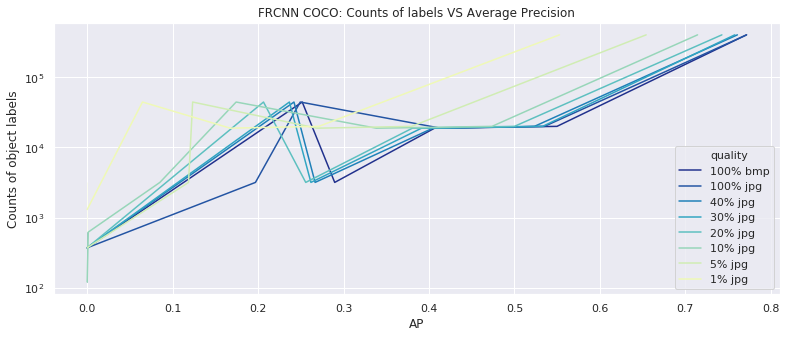

In [186]:
sns.set(rc={'figure.figsize':(13,5)})
ax = sns.lineplot(data_obj_merged["fcnn"], data_obj_merged["counts"], hue=data_obj_merged["quality"], palette="YlGnBu_r")
ax.set_yscale('log')
ax.set_title('FRCNN COCO: Counts of labels VS Average Precision')
ax.set(xlabel='AP', ylabel='Counts of object labels')
plt.savefig("img/FRCNNCOCOCountsoflabelsVSAveragePrecision.png", dpi=600)

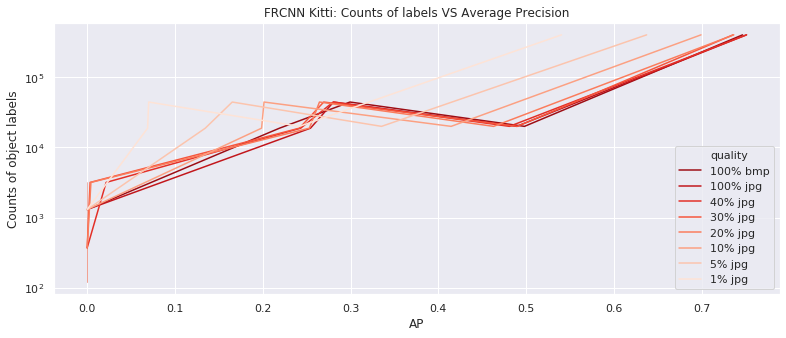

In [183]:
sns.set(rc={'figure.figsize':(13,5)})
ax = sns.lineplot(data_obj_merged["resnet"], data_obj_merged["counts"], hue=data_obj_merged["quality"], palette="Reds_r")
ax.set_yscale('log')
ax.set_title('FRCNN Kitti: Counts of labels VS Average Precision')
ax.set(xlabel='AP', ylabel='Counts of object labels')
plt.savefig("img/FRCNNKittiCountsoflabelsVSAveragePrecision.png", dpi=600)

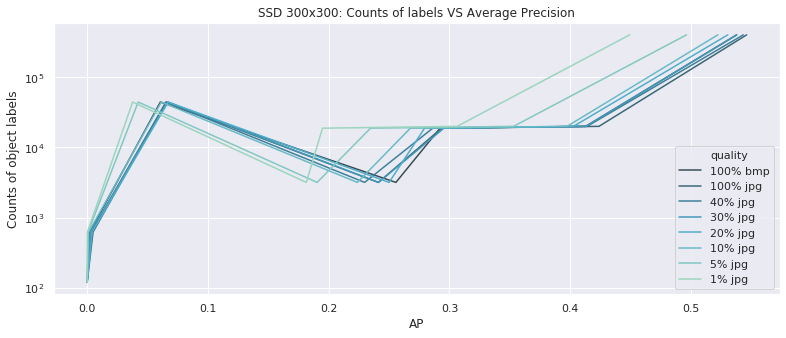

In [188]:
sns.set(rc={'figure.figsize':(13,5)})
ax = sns.lineplot(data_obj_merged["ssd"], data_obj_merged["counts"], hue=data_obj_merged["quality"], palette="GnBu_d")
ax.set_yscale('log')
ax.set_title('SSD 300x300: Counts of labels VS Average Precision')
ax.set(xlabel='AP', ylabel='Counts of object labels')
plt.savefig("img/SSDCountsoflabelsVSAveragePrecision.png", dpi=600)

In [131]:
data600 = pd.read_csv("../data/training_results_600x600.csv")
data600["quality"] = data600["quality"].map(str) + "% " + data600["type"]
data600 = data600[(data600["name"]!="Ignored")&(data600["name"]!="Bike_Bicycle_w/out_human")]
data_objects600 = data600[(data["name"]!="mAP at 0.5IOU")&(data600["name"]!="Test+Train Data Size GB")&(data600["name"]!="classification_loss")
           &(data600["name"]!="localization_loss")]
data_obj_merged600 = pd.merge(data_objects600, counts, how='left', left_on='name', right_on='name')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


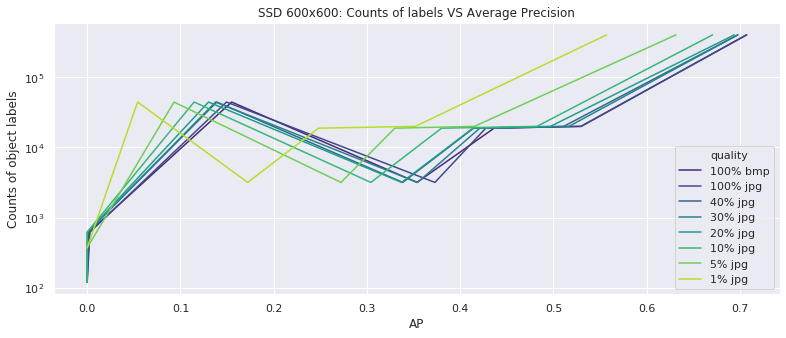

In [176]:
sns.set(rc={'figure.figsize':(13,5)})
ax = sns.lineplot(data_obj_merged600["ssd"], data_obj_merged600["counts"], hue=data_obj_merged600["quality"], palette="viridis")
ax.set_yscale('log')
ax.set_title('SSD 600x600: Counts of labels VS Average Precision')
ax.set(xlabel='AP', ylabel='Counts of object labels')
plt.savefig("img/SSD600CountsoflabelsVSAveragePrecision.png", dpi=600)

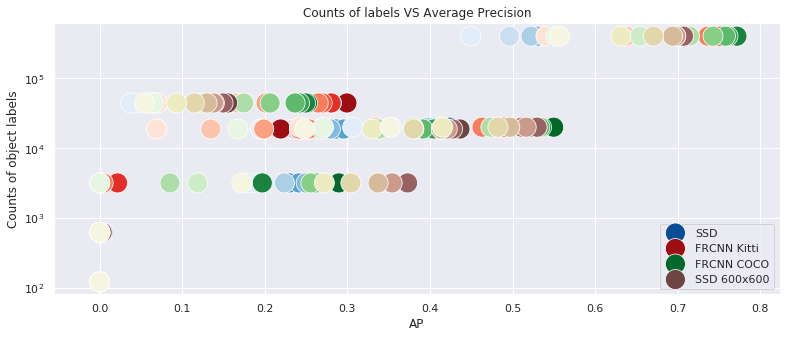

In [217]:
sns.set(rc={'figure.figsize':(13,5)})
ax = sns.scatterplot(data_obj_merged["ssd"], data_obj_merged["counts"], hue=data_obj_merged["quality"], palette="Blues_r", s=400, legend=False)
ax = sns.scatterplot(data_obj_merged["resnet"], data_obj_merged["counts"], hue=data_obj_merged["quality"], palette="Reds_r",  s=400,legend=False)
ax = sns.scatterplot(data_obj_merged["fcnn"], data_obj_merged["counts"], hue=data_obj_merged["quality"], palette="Greens_r", s=400, legend=False)
ax = sns.scatterplot(data_obj_merged600["ssd"], data_obj_merged600["counts"], hue=data_obj_merged600["quality"], palette="pink", s=400, legend=False)
ax.set_yscale('log')
ax.set_title('Counts of labels VS Average Precision')
ax.legend(loc='lower right', labels=['SSD', 'FRCNN Kitti', 'FRCNN COCO', 'SSD 600x600'])
ax.set(xlabel='AP', ylabel='Counts of object labels')
plt.savefig("img/ALLCountsoflabelsVSAveragePrecision_dot.png", dpi=600)

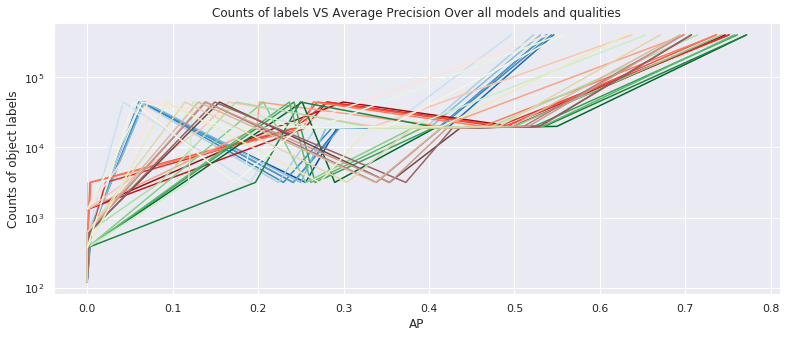

In [199]:
sns.set(rc={'figure.figsize':(13,5)})
ax = sns.lineplot(data_obj_merged["ssd"], data_obj_merged["counts"], hue=data_obj_merged["quality"], palette="Blues_r", legend=False)
ax = sns.lineplot(data_obj_merged["resnet"], data_obj_merged["counts"], hue=data_obj_merged["quality"], palette="Reds_r", legend=False)
ax = sns.lineplot(data_obj_merged["fcnn"], data_obj_merged["counts"], hue=data_obj_merged["quality"], palette="Greens_r", legend=False)
ax = sns.lineplot(data_obj_merged600["ssd"], data_obj_merged600["counts"], hue=data_obj_merged600["quality"], palette="pink", legend=False)

ax.set_yscale('log')
ax.set_title('Counts of labels VS Average Precision Over all models and qualities')
#ax.legend(loc='lower right', labels=['SSD', 'FRCNN Kitti', 'FRCNN COCO', 'SSD 600x600'])
ax.set(xlabel='AP', ylabel='Counts of object labels')
plt.savefig("img/ALLCountsoflabelsVSAveragePrecision_line.png", dpi=600)

In [34]:
data_obj_merged2 = pd.merge(data_obj_merged, area_mean, how='left', left_on='name', right_on='class')
data_obj_merged2.head()

,name,ssd,resnet,fcnn,quality,type,counts,class,area
0,Bicycle,0.002146,0.000000,0.000000,100% bmp,bmp,621,Bicycle,4812.985507
1,Bus,0.255653,0.000000,0.289679,100% bmp,bmp,3165,Bus,35957.296051
2,Motorbike,0.000000,0.000000,0.000000,100% bmp,bmp,121,Motorbike,5553.413223
3,PassengerCar,0.537846,0.746674,0.771481,100% bmp,bmp,399790,PassengerCar,11715.199500
4,Pedestrian,0.060617,0.299413,0.251673,100% bmp,bmp,44161,Pedestrian,3080.818165


In [140]:
data_obj_merged600 = pd.merge(data_obj_merged600, area_mean, how='left', left_on='name', right_on='class')

In [101]:
data_obj_merged2.name.unique()

array(['Bicycle', 'Bus', 'Motorbike', 'PassengerCar', 'Pedestrian',
       'Truck', 'Van'], dtype=object)

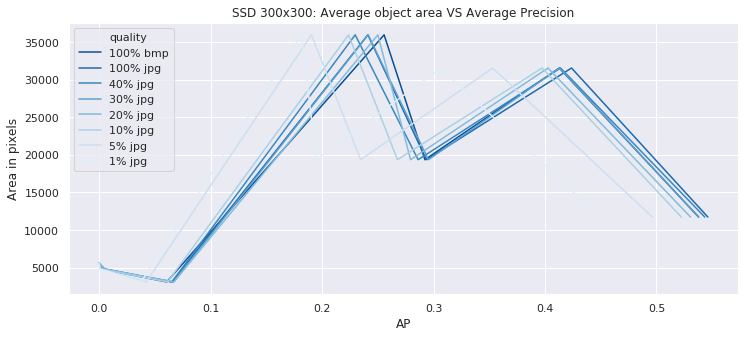

In [222]:
sns.set(rc={'figure.figsize':(12,5)})
ax = sns.lineplot(data_obj_merged2["ssd"], data_obj_merged2["area"], hue=data_obj_merged2["quality"], palette="Blues_r")
ax.set_title('SSD 300x300: Average object area VS Average Precision')
ax.set(xlabel='AP', ylabel='Area in pixels')
plt.savefig("img/SSD300AreaVSAveragePrecision.png", dpi=600)

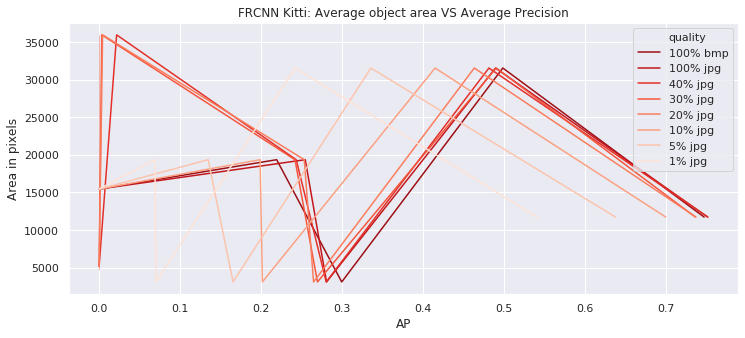

In [223]:
sns.set(rc={'figure.figsize':(12,5)})
ax = sns.lineplot(data_obj_merged2["resnet"], data_obj_merged2["area"], hue=data_obj_merged2["quality"], palette="Reds_r")
#ax = sns.lineplot(data_obj_merged2["fcnn"], data_obj_merged2["area"], hue=data_obj_merged2["quality"], palette="Greens_r")
#ax = sns.lineplot(data_obj_merged600["ssd"], data_obj_merged600["area"], hue=data_obj_merged600["quality"], palette="pink")
ax.set_title('FRCNN Kitti: Average object area VS Average Precision')
ax.set(xlabel='AP', ylabel='Area in pixels')
plt.savefig("img/FRCNNKittiAreaVSAveragePrecision.png", dpi=600)

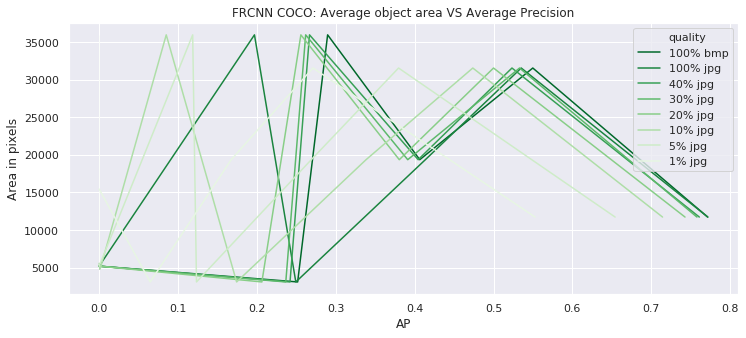

In [224]:
sns.set(rc={'figure.figsize':(12,5)})
ax = sns.lineplot(data_obj_merged2["fcnn"], data_obj_merged2["area"], hue=data_obj_merged2["quality"], palette="Greens_r")
#ax = sns.lineplot(data_obj_merged600["ssd"], data_obj_merged600["area"], hue=data_obj_merged600["quality"], palette="pink")
ax.set_title('FRCNN COCO: Average object area VS Average Precision')
ax.set(xlabel='AP', ylabel='Area in pixels')
plt.savefig("img/FRCNNCocoAreaVSAveragePrecision.png", dpi=600)

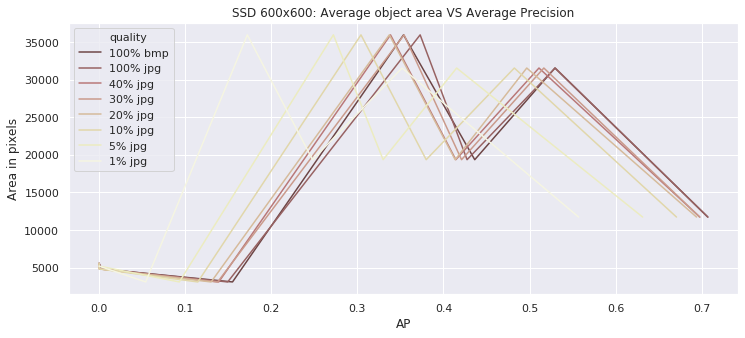

In [225]:
sns.set(rc={'figure.figsize':(12,5)})
#ax = sns.lineplot(data_obj_merged2["fcnn"], data_obj_merged2["area"], hue=data_obj_merged2["quality"], palette="Greens_r")
ax = sns.lineplot(data_obj_merged600["ssd"], data_obj_merged600["area"], hue=data_obj_merged600["quality"], palette="pink")
ax.set_title('SSD 600x600: Average object area VS Average Precision')
ax.set(xlabel='AP', ylabel='Area in pixels')
plt.savefig("img/SSD600AreaVSAveragePrecision.png", dpi=600)

### Assess the AP of larger objects on low quality images

In [206]:
qualities_small = ['10% jpg', '5% jpg', '1% jpg']
objects_large = ['Bus', 'Truck']

In [207]:
data_obj_merged3 = data_obj_merged2[((data_obj_merged2["name"] == objects_large[0]) 
                                     | (data_obj_merged2["name"] == objects_large[1]))
                                     & ((data_obj_merged2["quality"] == qualities_small[0]) 
                                     | (data_obj_merged2["quality"] == qualities_small[1])
                                     | (data_obj_merged2["quality"] == qualities_small[2]))]
data_obj_merged3

,name,ssd,resnet,fcnn,quality,type,counts,class,area
36,Bus,0.223775,0.000000,0.085075,10% jpg,jpg,3165,Bus,35957.296051
40,Truck,0.397359,0.414628,0.473739,10% jpg,jpg,19888,Truck,31544.600915
43,Bus,0.190448,0.000000,0.118600,5% jpg,jpg,3165,Bus,35957.296051
47,Truck,0.353111,0.335332,0.379594,5% jpg,jpg,19888,Truck,31544.600915
50,Bus,0.181443,0.000000,0.000000,1% jpg,jpg,3165,Bus,35957.296051
54,Truck,0.306344,0.241802,0.271078,1% jpg,jpg,19888,Truck,31544.600915


In [208]:
data_obj_merged600_2 = data_obj_merged600[((data_obj_merged600["name"] == objects_large[0]) 
                                           | (data_obj_merged600["name"] == objects_large[1]))
                                           & ((data_obj_merged600["quality"] == qualities_small[0]) 
                                           | (data_obj_merged600["quality"] == qualities_small[1])
                                          | (data_obj_merged600["quality"] == qualities_small[2]))]
data_obj_merged600_2

,name,ssd,quality,type,counts,class,area
41,Bus,0.304157,10% jpg,jpg,3165.0,Bus,35957.296051
45,Truck,0.482273,10% jpg,jpg,19888.0,Truck,31544.600915
49,Bus,0.272108,5% jpg,jpg,3165.0,Bus,35957.296051
53,Truck,0.415279,5% jpg,jpg,19888.0,Truck,31544.600915
57,Bus,0.172128,1% jpg,jpg,3165.0,Bus,35957.296051
61,Truck,0.351855,1% jpg,jpg,19888.0,Truck,31544.600915


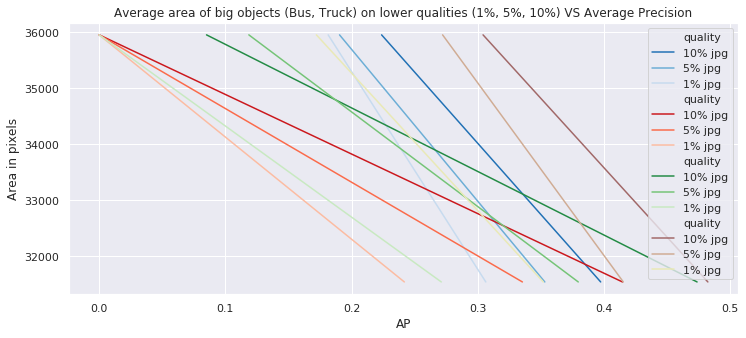

In [210]:
sns.set(rc={'figure.figsize':(12,5)})

ax = sns.lineplot(data_obj_merged3["ssd"], data_obj_merged3["area"], hue=data_obj_merged3["quality"], palette="Blues_r")
ax = sns.lineplot(data_obj_merged3["resnet"], data_obj_merged3["area"], hue=data_obj_merged3["quality"], palette="Reds_r")
ax = sns.lineplot(data_obj_merged3["fcnn"], data_obj_merged3["area"], hue=data_obj_merged3["quality"], palette="Greens_r")
ax = sns.lineplot(data_obj_merged600_2["ssd"], data_obj_merged600_2["area"], hue=data_obj_merged600_2["quality"], palette="pink")
ax.set_title('Average area of big objects (Bus, Truck) on lower qualities (1%, 5%, 10%) VS Average Precision')
#ax.legend(loc='upper right', labels=['SSD', 'FRCNN Kitti', 'FRCNN COCO', 'SSD 600x600'])
ax.set(xlabel='AP', ylabel='Area in pixels')
plt.savefig("img/SmallQualBigAreaVsAP.png", dpi=600)